In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
import keras


In [2]:

image_size=(244,244)
batch_size= 128

train_ds,val_ds=tf.keras.utils.image_dataset_from_directory('D:/New folder/Keggle Data/Water Bottle Image Classification/',
                                                            validation_split=0.2,subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,)
    

Found 486 files belonging to 3 classes.
Using 389 files for training.
Using 97 files for validation.


In [3]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pydot

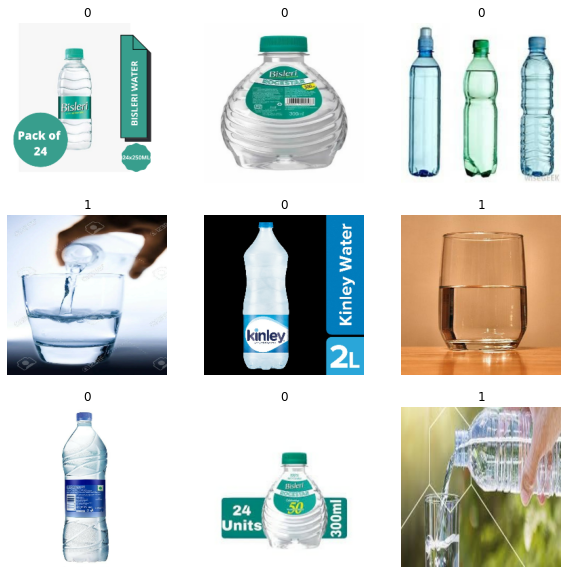

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
from keras import Sequential

In [7]:
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

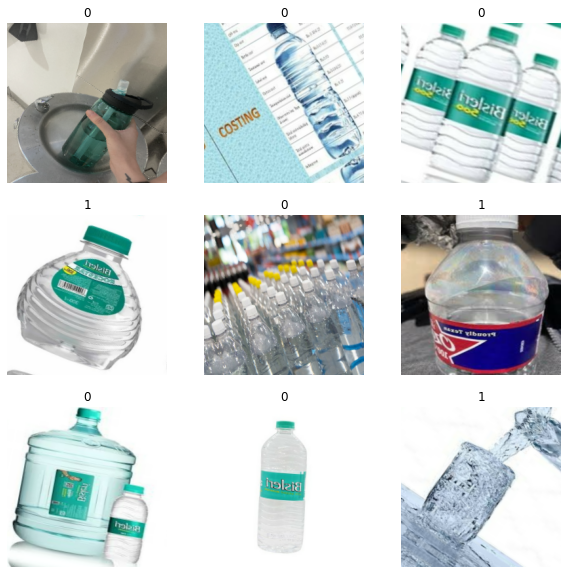

In [8]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
        for i in range(9):
            augmented_size=data_augmentation(images)
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(augmented_size[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")         
        

In [9]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

In [11]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[244,244,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
)

Epoch 1/10
4/4 [==============================] - 29s 5s/step - loss: 3239.7578 - accuracy: 0.3933 - val_loss: 500.0057 - val_accuracy: 0.5979
Epoch 2/10
4/4 [==============================] - 21s 4s/step - loss: 327.4165 - accuracy: 0.6427 - val_loss: 188.6284 - val_accuracy: 0.5979
Epoch 3/10
4/4 [==============================] - 19s 4s/step - loss: 102.0979 - accuracy: 0.6427 - val_loss: 14.0521 - val_accuracy: 0.5979
Epoch 4/10
4/4 [==============================] - 20s 4s/step - loss: 12.2377 - accuracy: 0.4550 - val_loss: 8.7423 - val_accuracy: 0.2887
Epoch 5/10
4/4 [==============================] - 19s 4s/step - loss: 7.3155 - accuracy: 0.3856 - val_loss: 1.0719 - val_accuracy: 0.5979
Epoch 6/10
4/4 [==============================] - 19s 4s/step - loss: 1.9116 - accuracy: 0.7198 - val_loss: 0.0545 - val_accuracy: 0.5670
Epoch 7/10
4/4 [==============================] - 19s 4s/step - loss: 0.7275 - accuracy: 0.7429 - val_loss: -0.1193 - val_accuracy: 0.6495
Epoch 8/10
4/4 [====

In [13]:
test_img=tf.keras.utils.load_img('D:/New folder/Keggle Data/Water Bottle Image Classification/Half water level/Half water level/1TbscDPF5xV-msTFYjNl8Hg2x.jpeg',
                                 target_size=(244,244))
x=tf.keras.utils.img_to_array(test_img)
x=np.expand_dims(x,axis=0)


In [14]:
x

array([[[[162., 208., 205.],
         [163., 208., 205.],
         [165., 207., 205.],
         ...,
         [ 97., 181., 192.],
         [ 97., 181., 192.],
         [ 96., 179., 193.]],

        [[162., 208., 205.],
         [163., 208., 205.],
         [165., 207., 205.],
         ...,
         [ 97., 181., 192.],
         [ 97., 181., 192.],
         [ 96., 179., 193.]],

        [[162., 208., 205.],
         [163., 208., 205.],
         [165., 207., 205.],
         ...,
         [ 97., 181., 192.],
         [ 97., 181., 192.],
         [ 96., 179., 193.]],

        ...,

        [[ 86., 178., 193.],
         [ 86., 178., 193.],
         [ 86., 178., 193.],
         ...,
         [ 86., 178., 193.],
         [ 86., 178., 193.],
         [ 86., 178., 193.]],

        [[ 86., 178., 193.],
         [ 86., 178., 193.],
         [ 86., 178., 193.],
         ...,
         [ 86., 178., 193.],
         [ 86., 178., 193.],
         [ 86., 178., 193.]],

        [[ 86., 178., 193.],
       

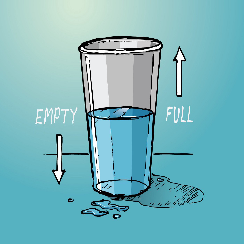

In [15]:
test_img

In [16]:
model.predict(x,batch_size=10)

1/1 [==============================] - 3s 3s/step


array([[0.9848829]], dtype=float32)